# REPORTE PRÁCTICA 9: Pronósticos con statsmodels

# Análisis de Datos Multivariado 

#  Caso de Estudio: 
## Condiciones en los Centros de Reinserción Social CERESO y Topo Chico   


####    Evely Gutiérrez Noda     #1935050


# Introducción

En el siguiente reporte se analiza el caso de estudio que permitirá evaluar las condiciones de reinserción social dentro del CERESO "Apodaca" y dentro del Centro Preventivo de Reinserción Topo Chico. Los datos que se usan para este estudio provienen de encuestas realizadas a mujeres y hombres, que se encuentran privados de libertad dentro del Centro de Reinserción.

En esta práctica se realizan pronósticos para predecir el valor que tomará una variable a partir de valores que haya tomado anteriormente.

El pronóstico se puede decir que es la predicción de lo que sucederá con un elemento determinado dentro del marco de un conjunto dado de condiciones. El pronóstico es muy útil en cualquiera de las ramas en que se utilice, por ejemplo, en el plano empresarial ayuda a reducir el rango de incertidumbre dentro del cual se toman las decisiones que afectan el futuro del negocio, que aunque el pronóstico no sustituye el juicio administrativo en la toma de decisiones, si ayuda en ese proceso.

Se va a intentar pronosticar la cantidad de años de sentencia que se les imponen a los internos basándose en las características personales y económicas de los internos:
- el nivel educacional
- la edad
- si tienen hijos
- su estado civil
- el ingreso mensual que tenían antes de estar privados a la libertad.

Para esto se necesita normalizar alguna de estas características para que estén entre cero y uno. La normalización aplicada en este caso sigue la siguiente fórmula:

**normalización = ( x – min(x) ) / ( max(x) – min(x) )**

In [105]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from numpy import isnan
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica6b.csv")

o.columns = ['age', 'education', 'prevRelStatus', 'incomePrev', 'hasChildren', 'sentenceYears']


o['age'] = o['age'].fillna(0)
o['education'] = o['education'].fillna(0)
o['prevRelStatus'] = o['prevRelStatus'].fillna(0)
o['incomePrev'] = o['incomePrev'].fillna(0)
o['hasChildren'] = o['hasChildren'].fillna(0)
o['sentenceYears'] = o['sentenceYears'].fillna(0)

x1 = pd.to_numeric(o.age)
x2 = pd.to_numeric(o.education)
x3 = pd.to_numeric(o.prevRelStatus)
x4 = pd.to_numeric(o.incomePrev)
x5 = pd.to_numeric(o.hasChildren)
x6 = pd.to_numeric(o.sentenceYears)

df = pd.DataFrame({"Edad": x1, "Edu": x2, "EC": x3, "IM": x4, "TH": x5, "Sent": x6})

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent'])
print(scaled_df.iloc[:10, :10])

scaled_df.to_csv('practica8.dat')


       Edad       Edu        EC   IM    TH  Sent
0  0.065217  0.285714  0.282828  1.0  0.50   0.0
1  0.434783  0.142857  0.353535  0.5  0.25   1.0
2  0.391304  0.142857  0.393939  0.5  0.75   0.2
3  0.086957  0.142857  0.323232  0.5  1.00   0.0
4  0.086957  0.428571  0.252525  0.5  0.50   1.0
5  0.304348  0.285714  0.404040  0.5  0.50   0.0
6  0.489130  0.285714  0.363636  1.0  1.00   0.0
7  0.271739  0.142857  0.000000  0.5  1.00   0.4
8  0.184783  0.285714  0.414141  1.0  0.50   1.0
9  0.206522  0.285714  0.545455  1.0  0.25   0.0


Ya teniendo todas las columnas normalizadas y con valores numéricos se realiza un primer pronóstico con el método **Holt**.

Edad    0.065217
Edu     0.285714
EC      0.282828
IM      1.000000
TH      0.500000
Sent    0.000000
Name: 0, dtype: float64


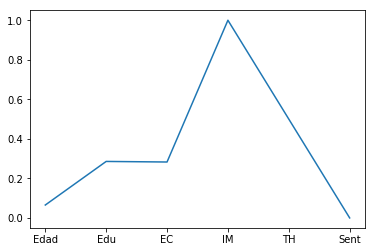

In [111]:
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt
from numpy import asarray
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
o = pd.read_csv("practica8.dat")

o.columns = ['','Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent']

o = o[['Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent']]

ejemplo = o.loc[0,:]
print(ejemplo)
x = range(len(ejemplo))
plt.plot(x, asarray(ejemplo))
plt.xticks(x, ejemplo.index)
plt.show()

La gráfica no muestra ninguna estacionalidad o tendencia, lo que sugiere que el conjunto de datos diferenciado por temporada es un buen punto de partida para el modelado. 

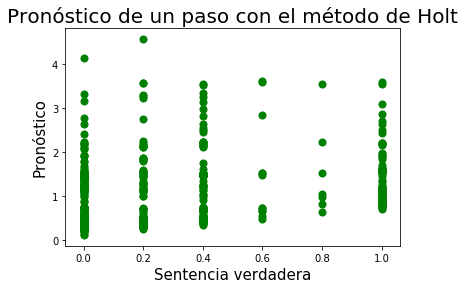

In [112]:
from statsmodels.tsa.api import Holt
import matplotlib.pyplot as plt
from numpy import asarray
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("practica8.dat")

d.columns = ['','Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent']

d = d[['Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent']]

lbls = d.columns
x = range(len(lbls))
pronosticos = []
for i in range(len(d)):
    y = asarray(d.loc[i,:])
    f = Holt(asarray(y)).fit(smoothing_level = 0.1)
    pronosticos.append(f.forecast(1))
plt.title('Pronóstico de un paso con el método de Holt', fontsize = 20)
plt.xlabel('Sentencia verdadera', fontsize = 15)
plt.ylabel('Pronóstico', fontsize = 15)
plt.scatter(d.Sent, pronosticos, c = 'g', s = 50)
plt.show()

Lo anterior a simple vista muestra que están bien clasificados, por lo que debería de ser un buen pronóstico. Se usa este conjunto de datos como una entrada para el modelo [ARIMA](https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/). 

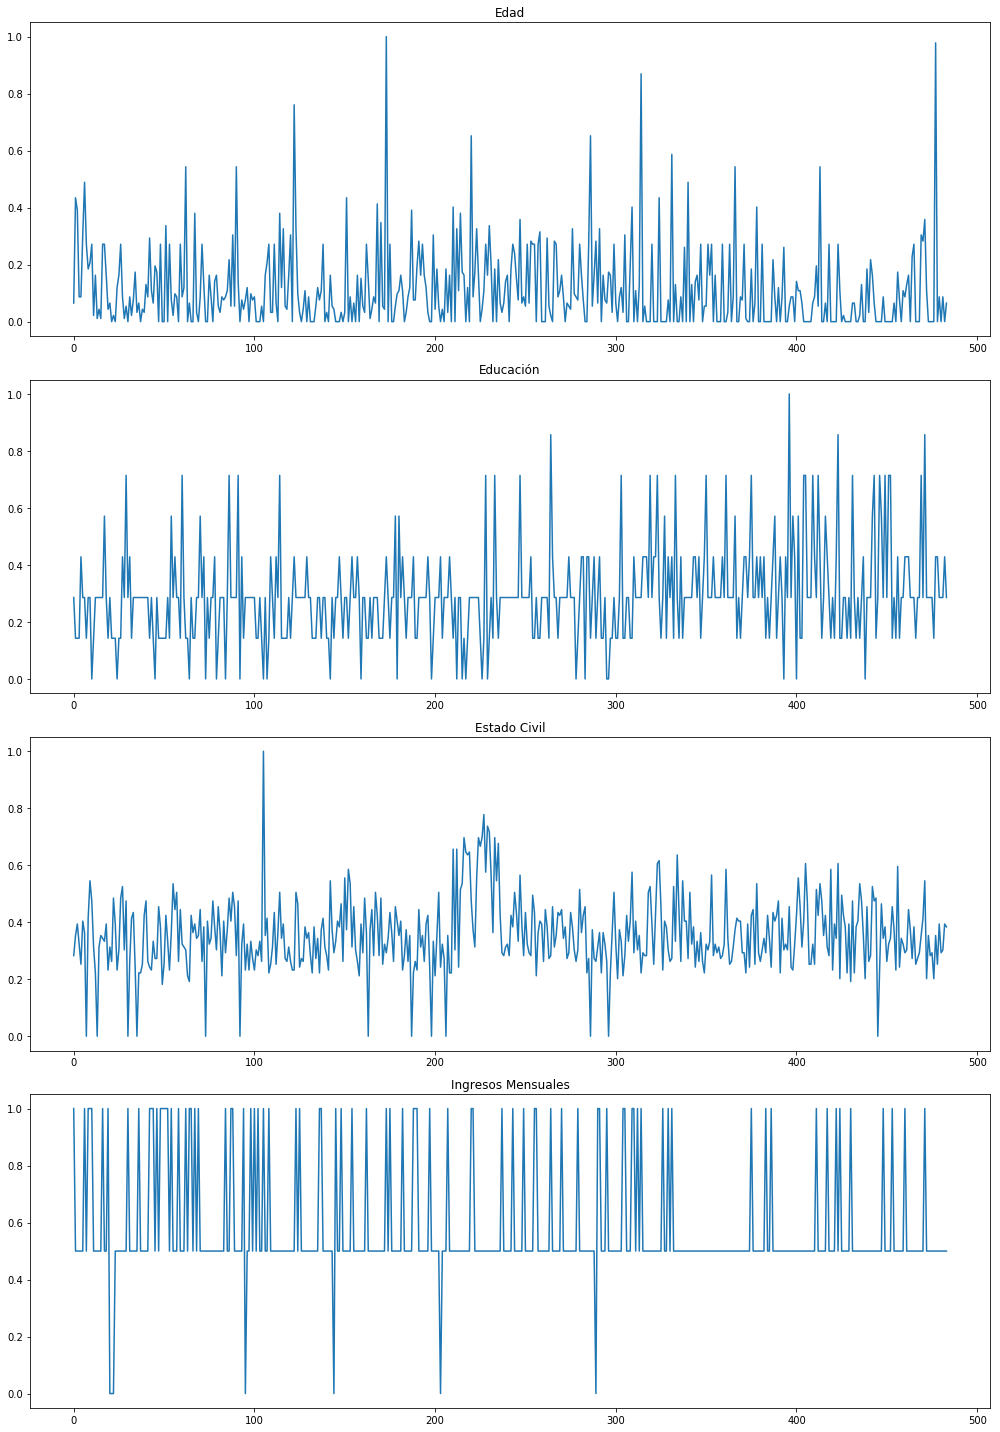

In [139]:
import matplotlib.pyplot as plt
from numpy import asarray
import pandas as pd
import ssl

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('practica8.dat')
x = range(len(d))

plt.rcParams["figure.figsize"] = [14, 20]
f = plt.figure() 
sf = f.add_subplot(411)
y = asarray(d['Edad'])
sf.plot(x, y)
sf.set_title('Edad')
sf = f.add_subplot(412)
y = asarray(d['Edu'])
sf.set_title('Educación')
sf.plot(x, y)
sf = f.add_subplot(413)
y = asarray(d['EC'])
sf.set_title('Estado Civil')
sf.plot(x, y)
sf = f.add_subplot(414)
y = asarray(d['IM'])
sf.set_title('Ingresos Mensuales')
sf.plot(x, y)
plt.tight_layout()
plt.show()

Se sigue probando que la serie sea estacionaria con el siguiente código.

Results of Dickey-Fuller Test:
Test Statistic	-23.133
p-value	0.000
#Lags Used	0.000
Number of Observations Used	483.000
Critical Value (1%)	-3.444
Critical Value (5%)	-2.868
Critical Value (10%)	-2.570Results of Dickey-Fuller Test:
Test Statistic	-11.020
p-value	0.000
#Lags Used	2.000
Number of Observations Used	481.000
Critical Value (1%)	-3.444
Critical Value (5%)	-2.868
Critical Value (10%)	-2.570Results of Dickey-Fuller Test:
Test Statistic	-4.707
p-value	0.000
#Lags Used	8.000
Number of Observations Used	475.000
Critical Value (1%)	-3.444
Critical Value (5%)	-2.868
Critical Value (10%)	-2.570Results of Dickey-Fuller Test:
Test Statistic	-13.679
p-value	0.000
#Lags Used	1.000
Number of Observations Used	482.000
Critical Value (1%)	-3.444
Critical Value (5%)	-2.868
Critical Value (10%)	-2.570Results of Dickey-Fuller Test:
Test Statistic	-9.909
p-value	0.000
#Lags Used	3.000
Number of Observations Used	480.000
Critical Value (1%)	-3.444
Critical Value (5%)	-2.868
Critical Value (10%

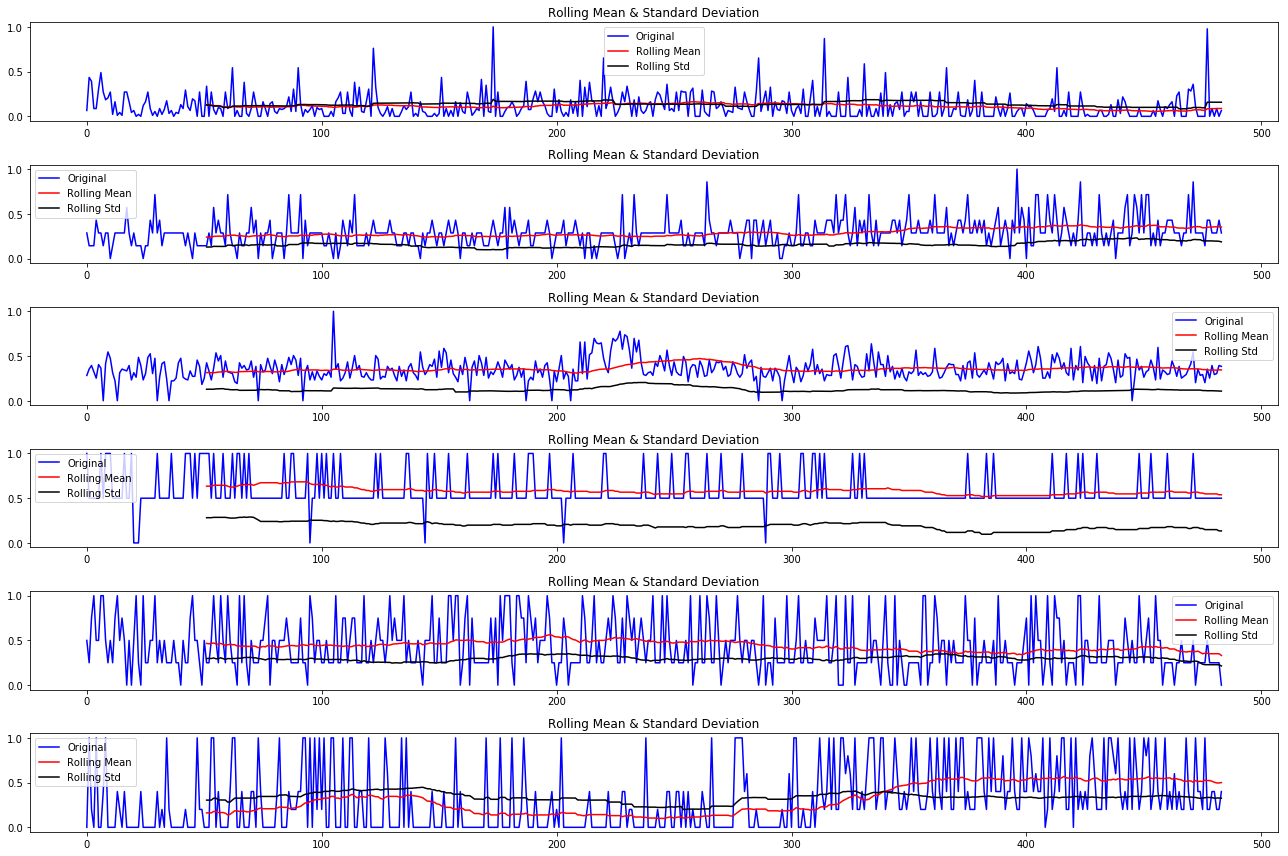

In [146]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import pandas as pd
import ssl

def test_stationarity(ts, w, r, i): 
    rolmean = ts.rolling(w).mean()
    rolstd = ts.rolling(w).std()
    plt.subplot(r, 1, i) 
    orig = plt.plot(ts, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value ({:s})'.format(key)] = value
    return 'Results of Dickey-Fuller Test:\n' + '\n'.join(['{:s}\t{:.3f}'.format(k, v) for (k, v) in dfoutput.items()])

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('practica8.dat')
plt.rcParams["figure.figsize"] = [18, 12]
f = plt.figure()     
i = 1
lvls = ['Edad', 'Edu', 'EC', 'IM', 'TH', 'Sent']
r = len(lvls)
t = ''
w = 52
for c in lvls:
    t += test_stationarity(d[c], w, r, i)
    i += 1
plt.tight_layout()
print(t)

En lo anterior, los valores P están por debajo de cualquier nivel de significancia razonable, por lo cual se evidencia que no existe tendencia. Luego se comprueba que tan bien se pronosticó en esta práctica con el siguiente código, comparando los resultados verdaderos con los del pronóstico. Se utilizan dos lógicas para comprobar y se evidencian en las gráficas que se explican luego.

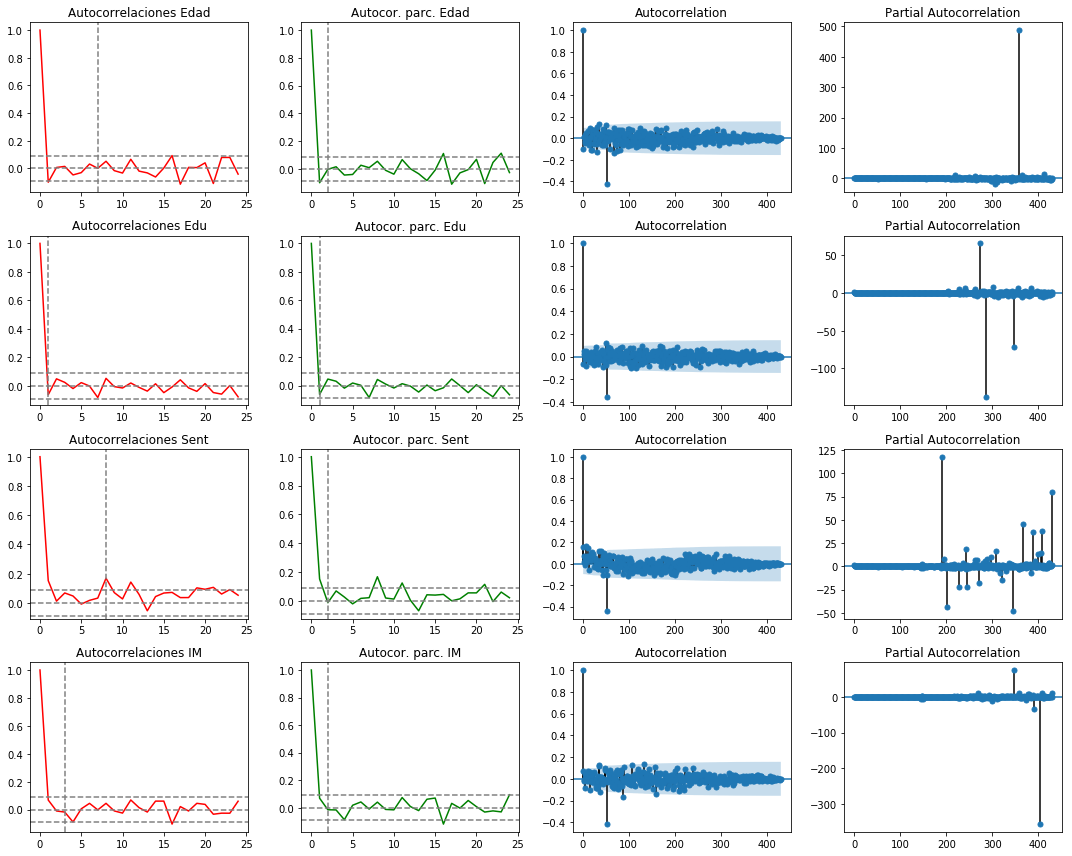

In [153]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import ssl

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('practica8.dat')
d = d.iloc[:-1, :] # quitar uno
plt.rcParams["figure.figsize"] = [15, 12]
f = plt.figure()
i = 1
n = len(d)
q = {'Edad': 7, 'Edu': 1, 'Sent': 8, 'IM': 3}
p = {'Edad': 2, 'Edu': 1, 'Sent': 2, 'IM': 2}
for c in ['Edad', 'Edu', 'Sent', 'IM']:
    ts = difference(asarray(d[c]), interval = 52).dropna()
    # primera logica
    plt.subplot(4, 4, i)
    i += 1
    plt.plot(acf(ts, nlags = 24), 'r')
    plt.axhline(y = 0, linestyle='--', color = 'gray')
    plt.axvline(x = q[c], linestyle = '--', color='gray')
    plt.axhline(y = -1.96 / sqrt(n), linestyle = '--', color='gray')
    plt.axhline(y = 1.96 / sqrt(n), linestyle = '--', color='gray')
    plt.title('Autocorrelaciones ' + c)
    plt.subplot(4, 4, i)
    i += 1
    plt.plot(pacf(ts, nlags = 24, method='ols'), 'g')
    plt.axhline(y = 0, linestyle = '--', color = 'gray')
    plt.axvline(x = p[c], linestyle = '--', color='gray')
    plt.axhline(y = -1.96 / sqrt(n),linestyle = '--', color='gray')
    plt.axhline(y = 1.96 / sqrt(n),linestyle = '--', color='gray')
    plt.title('Autocor. parc. ' + c)
    # segunda logica
    plt.subplot(4, 4, i)
    i += 1
    plot_acf(ts, ax = plt.gca())
    plt.subplot(4, 4, i)
    i += 1
    plot_pacf(ts, ax = plt.gca())
plt.tight_layout()

Las primeras dos columnas de gráficos corresponden a la lógica uno utilizada para comprobar que tan bueno es el pronóstico, buscando la coordenada x del primer cruce con el intervalo de confianza superior, se obtiene q = {'Edad': 7, 'Edu': 1, 'Sent': 8, 'IM': 3} p = {'Edad': 2, 'Edu': 1, 'Sent': 2, 'IM': 2}.
Las otras dos columnas que le siguen corresponden a la segunda lógica utilizada, donde se ven mal todas las autocorrelaciones y además se muestran picos en las parciales que no son buena señal.


In [155]:
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import ssl
 
# https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv('practica8.dat')
guardar = d.iloc[-1:, :]
d = d.iloc[:-1, :]
n = len(d)
q = {'Edad': 7, 'Edu': 1, 'Sent': 8, 'IM': 3}
p = {'Edad': 2, 'Edu': 1, 'Sent': 2, 'IM': 2}
prons = []
for c in ['Edad', 'Edu', 'Sent', 'IM']:
    ts = difference(asarray(d[c]), interval = 52).dropna()
    try:
        m = ARIMA(ts, order = (p[c], 1, q[c])) 
        f = m.fit(trend = 'nc', disp = 0)
        print('{:s}\tpron.\t'.format(c), int(round(f.forecast()[0][0] + d[c].iloc[n - 52])))
        print('{:s}\treal\t'.format(c), guardar[c].iloc[0])
    except:
        print(c, "no se pudo pronosticar con esos parámetros")
    print('...')

Edad no se pudo pronosticar con esos parámetros
...
Edu	pron.	 1
Edu	real	 0.2857142857142857
...
Sent	pron.	 0
Sent	real	 0.4
...
IM	pron.	 0
IM	real	 0.5
...


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


La edad de los internos no se pudo pronosticar, en el caso de los demás datos no dan pronósticos buenos, pero si se pueden pronosticar, incluyendo la sentencia de los internos, partiendo de las características personales y económicas de estos.